<a href="https://colab.research.google.com/github/NethraSubash/CodeClauseInternship_image-classifier-using-CNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

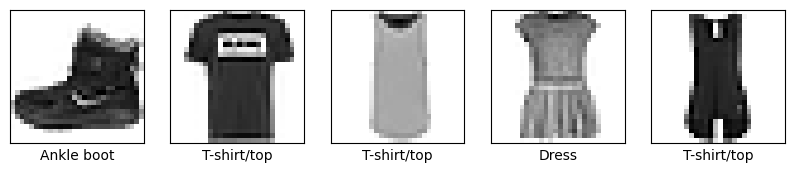

Number of training samples: 60000
Number of testing samples: 10000

Training set category distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Testing set category distribution:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Show number of training and testing samples
print(f"Number of training samples: {train_images.shape[0]}")
print(f"Number of testing samples: {test_images.shape[0]}")

# Show number of samples per category in training set
print("\nTraining set category distribution:")
unique_train_labels, counts_train = np.unique(train_labels, return_counts=True)
for i in range(len(unique_train_labels)):
    print(f"{class_names[unique_train_labels[i]]}: {counts_train[i]}")

# Show number of samples per category in testing set
print("\nTesting set category distribution:")
unique_test_labels, counts_test = np.unique(test_labels, return_counts=True)
for i in range(len(unique_test_labels)):
    print(f"{class_names[unique_test_labels[i]]}: {counts_test[i]}")

Number of training samples: 60000
Number of testing samples: 10000


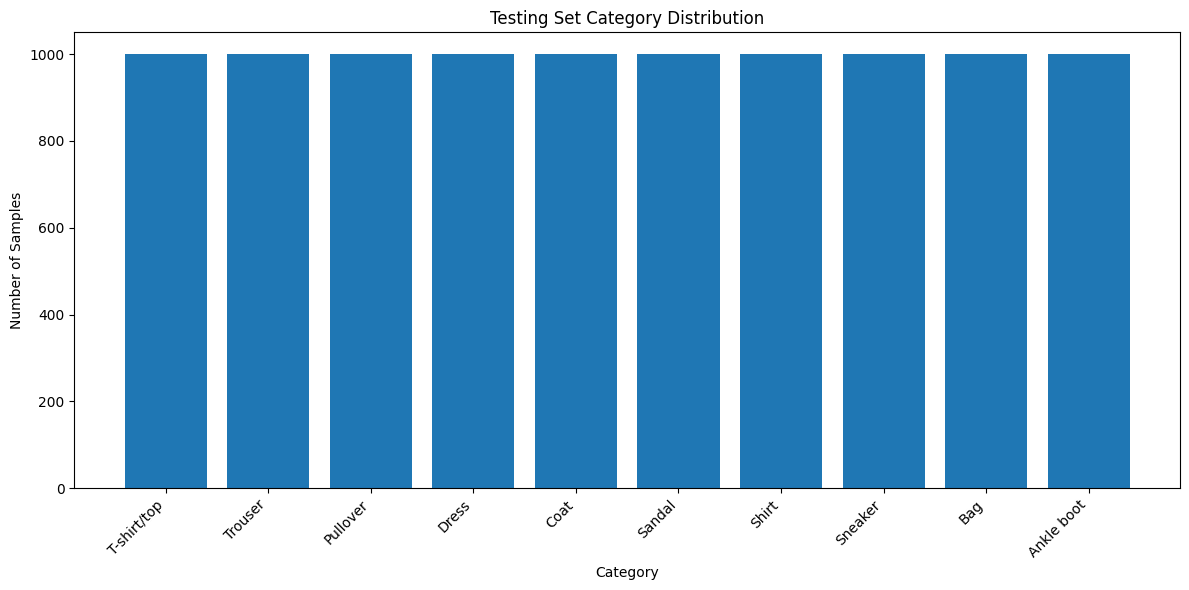

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show number of training and testing samples
print(f"Number of training samples: {train_images.shape[0]}")
print(f"Number of testing samples: {test_images.shape[0]}")

# Show number of samples per category in training set (bar plot)
unique_train_labels, counts_train = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(np.array(class_names)[unique_train_labels], counts_train)
plt.title("Training Set Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() #avoid labels being cut off
plt.show()

# Show number of samples per category in testing set (bar plot)
unique_test_labels, counts_test = np.unique(test_labels, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(np.array(class_names)[unique_test_labels], counts_test)
plt.title("Testing Set Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape images to (28, 28, 1) for CNN input
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2. Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for Fashion-MNIST

# 3. Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

# 4. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# 5. Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1]) #Adjusted y limit for fashion mnist
plt.legend(loc='lower right')
plt.show()

# 6. Make predictions on sample test images.
predictions = model.predict(test_images[:10])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.7475 - loss: 0.6843 - val_accuracy: 0.8673 - val_loss: 0.3672
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8820 - loss: 0.3262 - val_accuracy: 0.8856 - val_loss: 0.3147
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 34ms/step - accuracy: 0.8983 - loss: 0.2754 - val_accuracy: 0.8955 - val_loss: 0.2907
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9123 - loss: 0.2377 - val_accuracy: 0.8935 - val_loss: 0.2866
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9206 - loss: 0.2147 - val_accuracy: 0.9020 - val_loss: 0.2770
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9280 - loss: 0.1966 - val_accuracy: 0.9035 - val_loss: 0.2664
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.9337 - loss: 0.1803 - val_accuracy: 0.9070 - val_loss: 0.2668
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9398 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(true_labels, predicted_labels, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.84      0.86      1000
       Dress       0.94      0.87      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.72      0.75      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



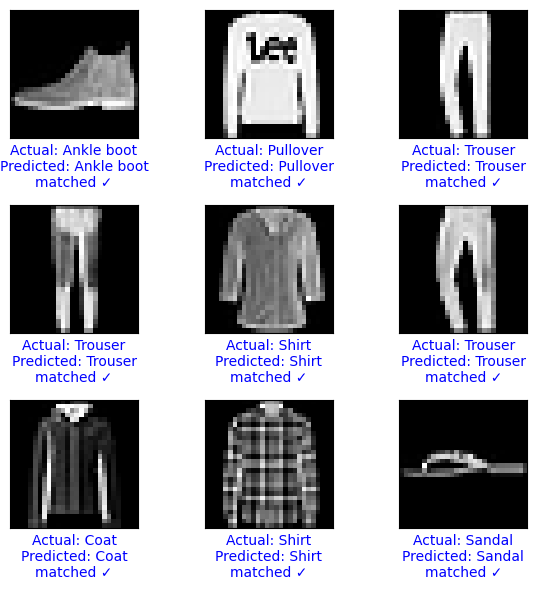

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have:
# - fashion_mnist dataset loaded as (train_images, train_labels), (test_images, test_labels)
# - class_names defined
# - predictions calculated (e.g., predictions = model.predict(test_images))

def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap='gray')  # Reshape for display

    predicted_label = np.argmax(predictions_array[i])
    true_class_name = class_names[np.argmax(true_label)] #changed to np.argmax to handle one hot encoded labels.
    predicted_class_name = class_names[predicted_label]

    if predicted_label == np.argmax(true_label): #changed to np.argmax to handle one hot encoded labels.
        marker = 'matched ✓'
        color = 'blue'
    else:
        marker = 'not matched ✗'
        color = 'red'

    plt.xlabel(f"Actual: {true_class_name}\nPredicted: {predicted_class_name}\n{marker}", color=color)

# Example usage (assuming predictions, test_labels, test_images are available):
num_rows = 3
num_cols = 3 #changed to 2 because we are displaying 10 images.
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, test_labels, test_images, class_names)

plt.tight_layout()
plt.show()